In [55]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

katalog_z_danymi = "pliki"

In [7]:
filenames = os.listdir(katalog_z_danymi)
filenames

['Kappa130.csv',
 'Kappa150.csv',
 'Kappa190.csv',
 'Kappa250.csv',
 'Kappa140.csv',
 'Kappa125.csv',
 'Kappa200.csv',
 'Kappa160.csv',
 'Kappa210.csv']

In [8]:
paths = [os.path.join(katalog_z_danymi, filename) for filename in filenames] # powinno też działać na windowsie
paths

['pliki/Kappa130.csv',
 'pliki/Kappa150.csv',
 'pliki/Kappa190.csv',
 'pliki/Kappa250.csv',
 'pliki/Kappa140.csv',
 'pliki/Kappa125.csv',
 'pliki/Kappa200.csv',
 'pliki/Kappa160.csv',
 'pliki/Kappa210.csv']

In [10]:
T_values = [int(re.findall(r"Kappa(.*).csv", filename)[0]) for filename in filenames]
T_values

[130, 150, 190, 250, 140, 125, 200, 160, 210]

In [11]:
all_data = [np.loadtxt(path) for path in paths]
all_data

[array([  2.35,   4.65,   7.  ,   9.95,  11.7 ,  14.  ,  16.3 ,  18.7 ,
         21.  ,  23.3 ,  25.15,  27.9 ,  30.4 ,  32.65,  34.95,  37.35,
         39.1 ,  41.9 ,  44.3 ,  46.55,  48.9 ]),
 array([  1.6 ,   4.35,   7.  ,   9.7 ,  12.3 ,  15.  ,  17.3 ,  20.3 ,
         23.  ,  25.7 ,  28.3 ,  31.  ,  33.7 ,  36.4 ,  39.  ,  41.7 ,
         44.45,  47.1 ,  49.8 ]),
 array([  3.1 ,   6.3 ,   9.5 ,  12.6 ,  15.8 ,  19.  ,  22.1 ,  25.3 ,
         28.95,  31.6 ,  34.3 ,  37.95,  41.1 ,  44.35,  47.5 ]),
 array([  0.2 ,   4.45,   8.5 ,  12.7 ,  17.  ,  21.1 ,  25.3 ,  29.5 ,
         33.7 ,  37.9 ,  42.1 ,  46.25]),
 array([  0.85,   3.3 ,   5.8 ,   8.8 ,  10.75,  13.3 ,  15.8 ,  18.25,
         20.7 ,  23.2 ,  25.7 ,  28.2 ,  30.7 ,  33.2 ,  35.65,  38.15,
         40.6 ,  43.1 ,  45.6 ,  48.1 ]),
 array([  1.  ,   3.2 ,   5.4 ,   7.6 ,   9.7 ,  11.9 ,  14.1 ,  16.25,
         18.4 ,  20.5 ,  21.8 ,  25.  ,  27.2 ,  29.35,  31.5 ,  33.7 ,
         35.8 ,  38.  ,  40.2 ,  42.4 ,  44.55

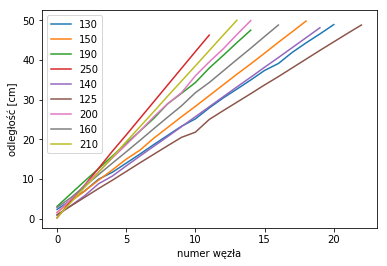

In [69]:
M = 4.81e-26
k = 1.3806e-23
T = (273.15 + 26)
kT = k * T

with open("tabelka.tex", "w") as file:
    dataframe = pd.DataFrame(columns=["k", "M", "T", r"$\Delta$T", "f", "$\Delta$f", "$\lambda$", "$\Delta\lambda$", "$\Delta\kappa$", "d$\kappa$"])
    for indeks, T, data in zip(range(len(T_values)), T_values, all_data):
        plt.plot(data, label=T)
        x = np.arange(data.size)
        fit, covs = np.polyfit(x, data, 1, cov = True)
        a = fit[0]
        da = covs[0,0]**0.5
        Lambda, dLambda = 2e-2*a, 2e-2*da
        f = 1/(T * 1e-6)
        df = 1 # DO POPRAWKI
        dT = 1 # TAKOŻ
        kappa = (Lambda * f)**2 * M/kT
        dkappa = 1 # DO POPRAWKI
        dataframe.loc[indeks] = (k, M, T, dT, f, df, Lambda, dLambda, kappa, dkappa)
    plt.legend()
    plt.ylabel("odległość [cm]")
    plt.xlabel("numer węzła")
    file.write(dataframe.to_latex())